In [97]:
import numpy as np
# import dataset iris
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
db = load_iris()
db = pd.DataFrame(data= np.c_[db['data'], db['target']], columns= db['feature_names'] + ['target'])
db.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [99]:
db['target'].value_counts()


target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [100]:
# drop evry lign with target 2
db = db[db['target'] != 2]
db['target'].value_counts()

target
0.0    50
1.0    50
Name: count, dtype: int64

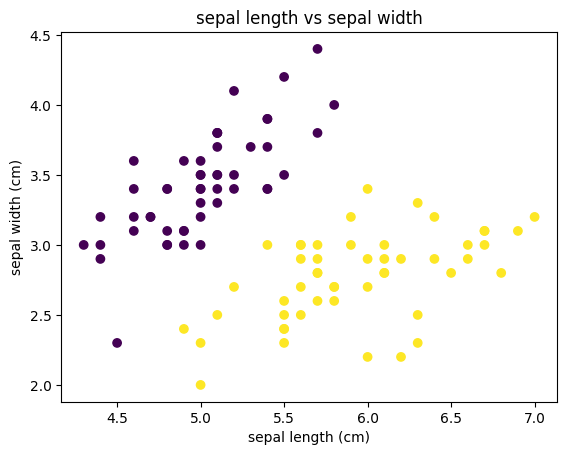

In [101]:
plt.scatter(db['sepal length (cm)'], db['sepal width (cm)'], c=db['target'])
#add a lign to separate the two classes
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal length vs sepal width')
plt.show()

In [102]:
from perseptron_class_from_scratch import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Generate a random n-class classification problem.
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perceptron = Perceptron()


perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
accuracy = np.mean(y_pred == y_test)


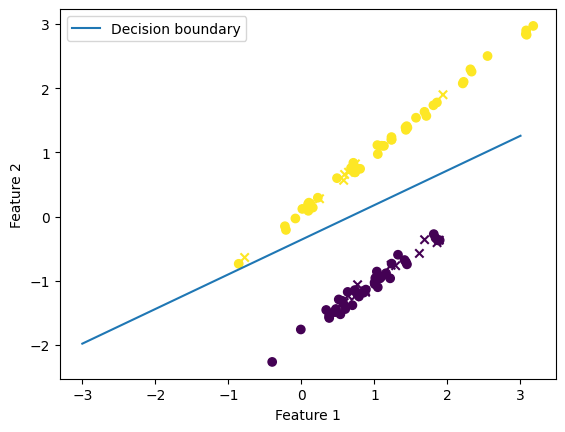

In [108]:
# plot perceptron decision boundary and the train data and the test data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train , marker='o')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='x')
w = perceptron.weights
b = perceptron.bias
x = np.linspace(-3, 3, 100)  # Adjusted range for x
y = -w[0] / w[1] * x - b / w[1]
plt.plot(x, y, label='Decision boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
